In [45]:
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
data = pd.read_json('data/world_bank_projects.json')
data[ ['countryname', 'countryshortname'] ].head(3)

,countryname,countryshortname
0,Federal Democratic Republic of Ethiopia,Ethiopia
1,Republic of Tunisia,Tunisia
2,Tuvalu,Tuvalu


In [47]:
type(data), len(data)

(pandas.core.frame.DataFrame, 500)

In [48]:
data.columns

Index(['_id', 'approvalfy', 'board_approval_month', 'boardapprovaldate',
       'borrower', 'closingdate', 'country_namecode', 'countrycode',
       'countryname', 'countryshortname', 'docty', 'envassesmentcategorycode',
       'grantamt', 'ibrdcommamt', 'id', 'idacommamt', 'impagency',
       'lendinginstr', 'lendinginstrtype', 'lendprojectcost',
       'majorsector_percent', 'mjsector_namecode', 'mjtheme',
       'mjtheme_namecode', 'mjthemecode', 'prodline', 'prodlinetext',
       'productlinetype', 'project_abstract', 'project_name', 'projectdocs',
       'projectfinancialtype', 'projectstatusdisplay', 'regionname', 'sector',
       'sector1', 'sector2', 'sector3', 'sector4', 'sector_namecode',
       'sectorcode', 'source', 'status', 'supplementprojectflg', 'theme1',
       'theme_namecode', 'themecode', 'totalamt', 'totalcommamt', 'url'],
      dtype='object')

In [49]:
data.head()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Percent': 100, 'Name': 'Education for all'}","[{'code': '65', 'name': 'Education for all'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Percent': 30, 'Name': 'Other economic manage...","[{'code': '24', 'name': 'Other economic manage...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en
2,{'$oid': '52b213b38594d8a2be17c782'},2014,November,2013-11-01T00:00:00Z,MINISTRY OF FINANCE AND ECONOMIC DEVEL,NaN,Tuvalu!$!TV,TV,Tuvalu,Tuvalu,...,TI,IBRD,Active,Y,"{'Percent': 46, 'Name': 'Regional integration'}","[{'code': '47', 'name': 'Regional integration'...","52,81,25,47",6060000,6060000,http://www.worldbank.org/projects/P145310?lang=en
3,{'$oid': '52b213b38594d8a2be17c783'},2014,October,2013-10-31T00:00:00Z,MIN. OF PLANNING AND INT'L COOPERATION,NaN,Republic of Yemen!$!RY,RY,Republic of Yemen,"Yemen, Republic of",...,JB,IBRD,Active,N,"{'Percent': 50, 'Name': 'Participation and civ...","[{'code': '57', 'name': 'Participation and civ...","59,57",0,1500000,http://www.worldbank.org/projects/P144665?lang=en
4,{'$oid': '52b213b38594d8a2be17c784'},2014,October,2013-10-31T00:00:00Z,MINISTRY OF FINANCE,2019-04-30T00:00:00Z,Kingdom of Lesotho!$!LS,LS,Kingdom of Lesotho,Lesotho,...,"FH,YW,YZ",IBRD,Active,N,"{'Percent': 30, 'Name': 'Export development an...","[{'code': '45', 'name': 'Export development an...","41,45",13100000,13100000,http://www.worldbank.org/projects/P144933/seco...


In [50]:
data.to_csv("./DATA/world_bank_projects.csv", header=True)

# Top 10 countries with most projects:

In [51]:
#data1 = data.loc[:, ['countryname','countryshortname']].groupby('countryshortname').count().sort_values('countryname', ascending=False)
data1 = data.loc[:, ['countryname', 'countryshortname']].groupby('countryshortname').count().sort_values('countryname', ascending=False)
data1.head(3)

,countryname
countryshortname,
China,19
Indonesia,19
Vietnam,17


# Data Cleaning

In [52]:
data['countryshortname'].value_counts()[0:10]

China                 19
Indonesia             19
Vietnam               17
India                 16
Yemen, Republic of    13
Morocco               12
Nepal                 12
Bangladesh            12
Africa                11
Mozambique            11
Name: countryshortname, dtype: int64

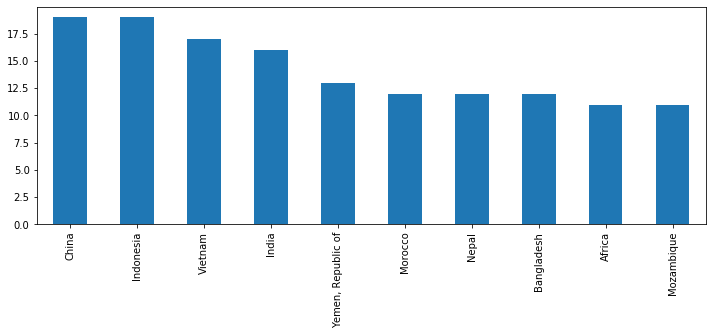

In [53]:
data['countryshortname'].value_counts()[0:10].plot(kind='bar', figsize=(12,4))
plt.show()

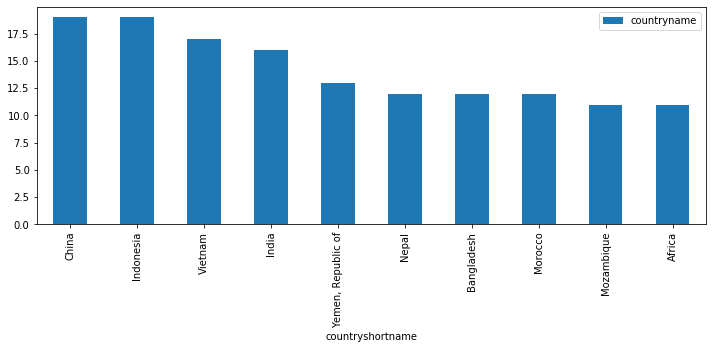

In [54]:
data1[0:10].plot(kind='bar', figsize=(12,4))
plt.show()

# Top 10 major project themes for column 'mjtheme_namecode'

In [55]:
data2 = data.loc[:, ['theme_namecode','mjthemecode']]
data2.head()

,theme_namecode,mjthemecode
0,"[{'code': '65', 'name': 'Education for all'}]","8,11"
1,"[{'code': '24', 'name': 'Other economic manage...","1,6"
2,"[{'code': '47', 'name': 'Regional integration'...","5,2,11,6"
3,"[{'code': '57', 'name': 'Participation and civ...","7,7"
4,"[{'code': '45', 'name': 'Export development an...","5,4"


In [56]:
data2.dropna(inplace=True)
data2.head(15)

,theme_namecode,mjthemecode
0,"[{'code': '65', 'name': 'Education for all'}]","8,11"
1,"[{'code': '24', 'name': 'Other economic manage...","1,6"
2,"[{'code': '47', 'name': 'Regional integration'...","5,2,11,6"
3,"[{'code': '57', 'name': 'Participation and civ...","7,7"
4,"[{'code': '45', 'name': 'Export development an...","5,4"
5,"[{'code': '54', 'name': 'Social safety nets'}]","6,6"
6,"[{'code': '25', 'name': 'Administrative and ci...","2,4"
7,"[{'code': '81', 'name': 'Climate change'}]","11,8"
8,"[{'code': '79', 'name': 'Other rural developme...","10,7"
9,"[{'code': '29', 'name': 'Other accountability/...","2,2,2"


In [57]:
#for n in range(len(data2)):
data2.loc[0,:]["theme_namecode"][0]['name']


'Education for all'

In [59]:
import json

In [60]:
with open('data/world_bank_projects.json') as fh:
    data = json.load(fh)

In [69]:
type(data), len(data[0]), data[40]

(list,
 50,
 {'sector': [{'Name': 'General water, sanitation and flood protection sector'},
   {'Name': 'Public administration- Water, sanitation and flood protection'},
   {'Name': 'Information technology'}],
  'supplementprojectflg': 'N',
  'projectfinancialtype': 'IBRD',
  'prodline': 'PE',
  'mjtheme': ['Environment and natural resources management',
   'Social protection and risk management',
   'Environment and natural resources management',
   'Environment and natural resources management'],
  'idacommamt': 0,
  'impagency': 'RUSSIA HYROMETEOROLOGICAL SERVICE',
  'project_name': 'RUSSIA HYDROMETEOROLOGICAL SERVICES MODERNIZATION',
  'mjthemecode': '11,6,11,11',
  'closingdate': '2018-12-31T00:00:00Z',
  'totalcommamt': 60000000,
  'id': 'P127676',
  'mjsector_namecode': [{'code': 'WX',
    'name': 'Water, sanitation and flood protection'},
   {'code': 'BX', 'name': 'Public Administration, Law, and Justice'},
   {'code': 'CX', 'name': 'Information and communications'}],
  'docty'

In [77]:
from pandas.io.json import json_normalize

In [79]:
df = json_normalize(data, 'mjtheme_namecode')
df.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


In [82]:
df.name.replace(' ', 'NAME_MISSING', inplace=True)
df.head(15)

,code,name
0,8,Human development
1,11,NAME_MISSING
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


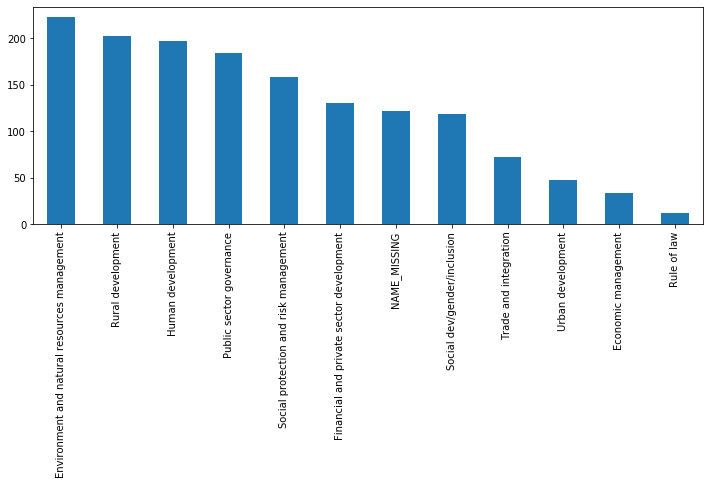

In [111]:
df['name'].value_counts().plot(kind='bar', figsize=(12,4))
plt.show()